In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Clustering

In [8]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
X=data[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

In [11]:
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


# K-Means CLustering

In [13]:
from sklearn.cluster import KMeans

In [32]:
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

### adding labels to the data 

In [33]:
cluster_labels=kmeans.labels_

In [34]:
data['Cluster']=cluster_labels

In [35]:
## Visualizing the clusters

import matplotlib.pyplot as plt
import seaborn as sns

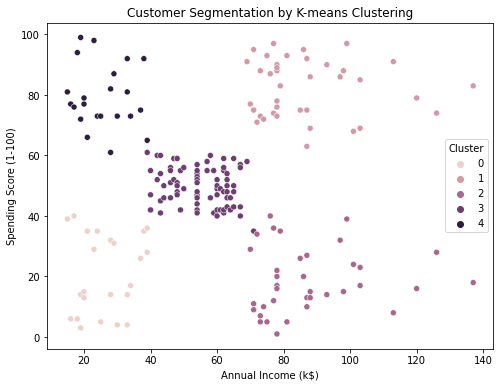

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data)
plt.title('Customer Segmentation by K-means Clustering')
plt.show()

## cluster Centroids

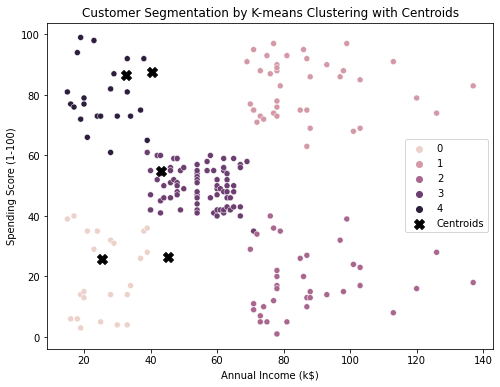

In [37]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, color='black', label='Centroids')
plt.title('Customer Segmentation by K-means Clustering with Centroids')
plt.legend()
plt.show()

### CLuster Silhouette Analysis

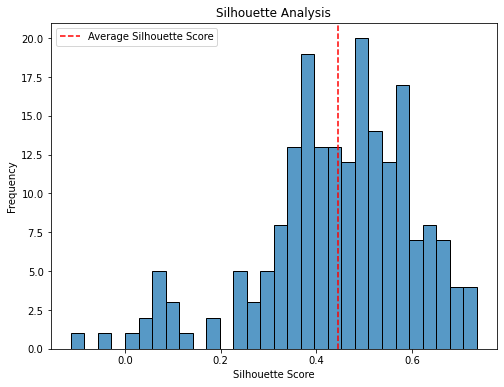

In [38]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_vals=silhouette_samples(X,cluster_labels)
silhouette_avg=silhouette_score(X,cluster_labels)

plt.figure(figsize=(8,6))
sns.histplot(silhouette_vals,bins=30)
plt.axvline(x=silhouette_avg,color='red',linestyle='--',label='Average Silhouette Score')
plt.title('Silhouette Analysis')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Dimensionality Reduction Visualization (using t-SNE):

C:\Users\91895\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\91895\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


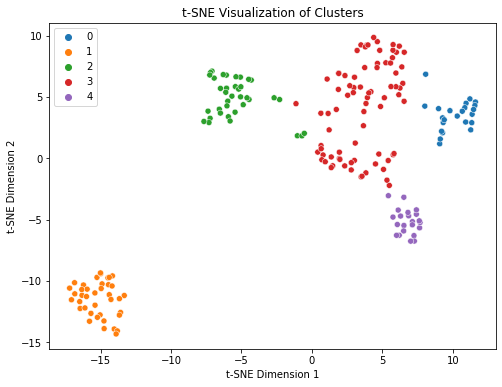

In [40]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=cluster_labels, palette='tab10')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

## Gausian Clustering

In [65]:
data=pd.read_csv('Mall_Customers.csv')

In [66]:
X=data[['Age','Annual Income (k$)',
       'Spending Score (1-100)']]

In [67]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [68]:
from sklearn.mixture import GaussianMixture

In [70]:
g_model=GaussianMixture(n_components=5)

In [72]:
y_means=g_model.fit_predict(X)

In [76]:
y_means

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 0,
       2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

In [77]:
cluster_labels=y_means
data['cluster']=cluster_labels

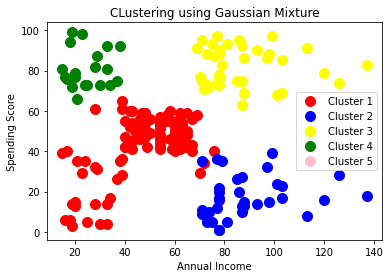

In [87]:
plt.scatter(X.iloc[y_means==0,1],X.iloc[y_means==0,2],s=100,c='red',label='Cluster 1')
plt.scatter(X.iloc[y_means==1,1],X.iloc[y_means==1,2],s=100,c='blue',label='Cluster 2')
plt.scatter(X.iloc[y_means==2,1],X.iloc[y_means==2,2],s=100,c='yellow',label='Cluster 3')
plt.scatter(X.iloc[y_means==3,1],X.iloc[y_means==3,2],s=100,c='green',label='Cluster 4')
plt.scatter(X.iloc[y_means==4,1],X.iloc[y_means==4,2],s=100,c='pink',label='Cluster 5')
plt.title("CLustering using Gaussian Mixture")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## BIRCH algorithm

In [88]:
from sklearn.cluster import Birch

In [89]:
birch_model=Birch(threshold=0.04, n_clusters=4)
y_means=birch_model.fit_predict(X)

In [90]:
y_means

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

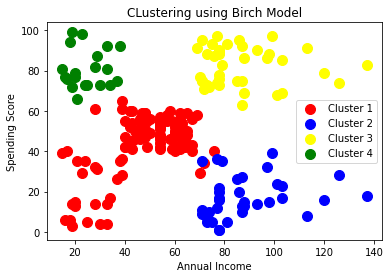

In [91]:
plt.scatter(X.iloc[y_means==0,1],X.iloc[y_means==0,2],s=100,c='red',label='Cluster 1')
plt.scatter(X.iloc[y_means==1,1],X.iloc[y_means==1,2],s=100,c='blue',label='Cluster 2')
plt.scatter(X.iloc[y_means==2,1],X.iloc[y_means==2,2],s=100,c='yellow',label='Cluster 3')
plt.scatter(X.iloc[y_means==3,1],X.iloc[y_means==3,2],s=100,c='green',label='Cluster 4')
plt.title("CLustering using Birch Model")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Mean Shift Clustering

In [92]:
from sklearn.cluster import MeanShift

In [93]:
mean_model=MeanShift()

In [94]:
y_means=mean_model.fit_predict(X)

In [95]:
y_means

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)